# Skenario 12.1

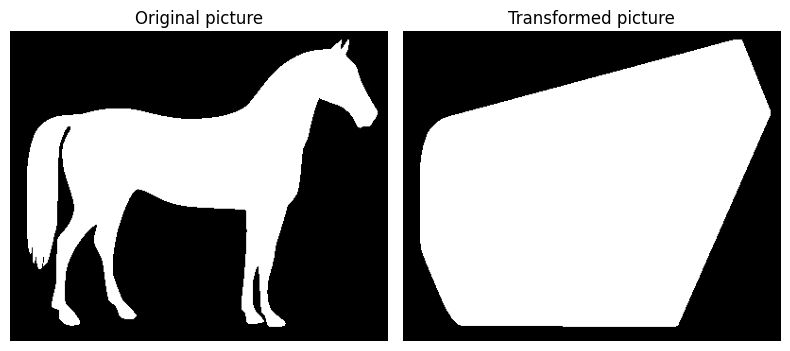

In [2]:
import matplotlib.pyplot as plt
from skimage.morphology import convex_hull_image
from skimage import data, img_as_float
from skimage.util import invert

#The original image is inverted as the object must be white.

image = invert(data.horse())
chull = convex_hull_image(image)
fig, axes = plt.subplots(1, 2, figsize=(8,4))

ax = axes.ravel()
ax[0].set_title('Original picture')
ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_axis_off()

ax[1].set_title('Transformed picture')
ax[1].imshow(chull, cmap=plt.cm.gray)
ax[1].set_axis_off()

plt.tight_layout()
plt.show()

# Skenario 12.2

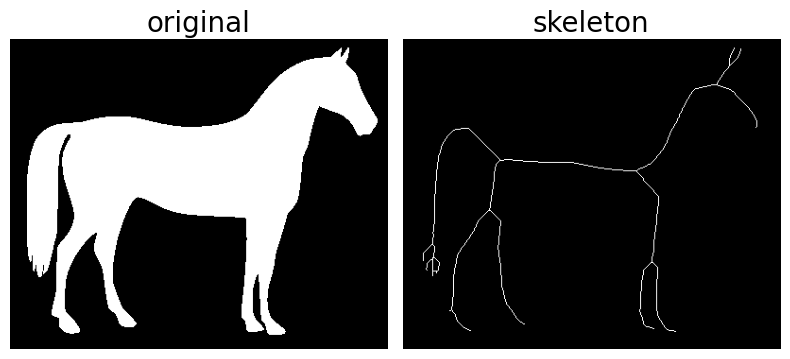

In [3]:
from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert

#Invert the horse image
image = invert(data.horse())

#perform skeletonization
skeleton = skeletonize(image)

#display results
fig, axes = plt.subplots(
    nrows=1, ncols=2,
    figsize = (8, 4),
    sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)
ax[1].axis('off')
ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].set_title('skeleton', fontsize=20)
fig.tight_layout()
plt.show()

# Skenario 12.3

Text(0.5, 1.0, 'Active Contour Image')

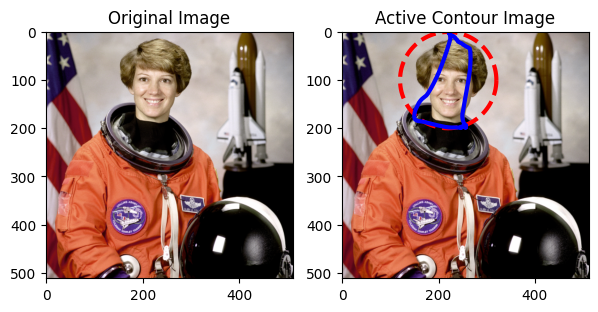

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour

img = data.astronaut()
#Data for circular boundary
s = np.linspace(0, 2*np.pi, 400)
x = 220 + 100 * np.cos(s)
y = 100 + 100 * np.sin(s)
init = np.array([x, y]).T
#formation of the active contour
cntr = active_contour(
    gaussian(img, 3),  init,
    alpha = 0.015, beta=10, gamma=0.001)

fig, ax = plt.subplots(1, 2, figsize = (7, 7))
ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title("Original Image")

ax[1].imshow(img, cmap=plt.cm.gray)

#circular boundary.
ax[1].plot(init[:, 0], init[:, 1], '--r', lw=3)
ax[1].plot(cntr[:, 0], cntr[:, 1], '-b', lw=3)
ax[1].set_title("Active Contour Image")

# Skenario 12.4

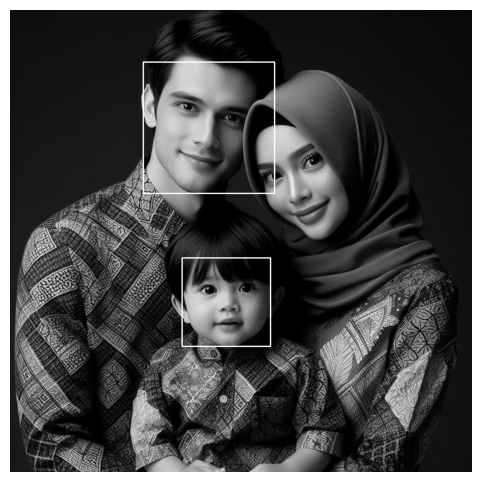

In [5]:
import io
import zipfile
import requests
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('/content/drive/MyDrive/Bahan PCD/family.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

path = '/content/drive/MyDrive/Bahan PCD/haarcascade_frontalface_default.xml'

face_cascade = cv2.CascadeClassifier(path)
for x, y, w, h in face_cascade.detectMultiScale(gray, 1.3):
  cv2.rectangle(gray, (x, y), (x+w, y + h), (255, 0,0), 2)
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
ax.imshow(gray, cmap=plt.cm.gray)
ax.set_axis_off()

# 12.5 Tugas
Berdasarkan latihan yang sudah Anda kerjakan, lakukanlah modifikasi pada beberapa sintaks untuk mencapat target berikut:
1. Memperbaiki citra hasil active contour agar garis biru bisa berada di sekeliling kepala astronot.
2. Memperbaiki citra hasil deteksi wajah agar seluruh wajah dalam citra dapat terdeteksi dengan tepat

### 1. Memperbaiki citra hasil active contour agar garis biru bisa berada di sekeliling kepala astronot.

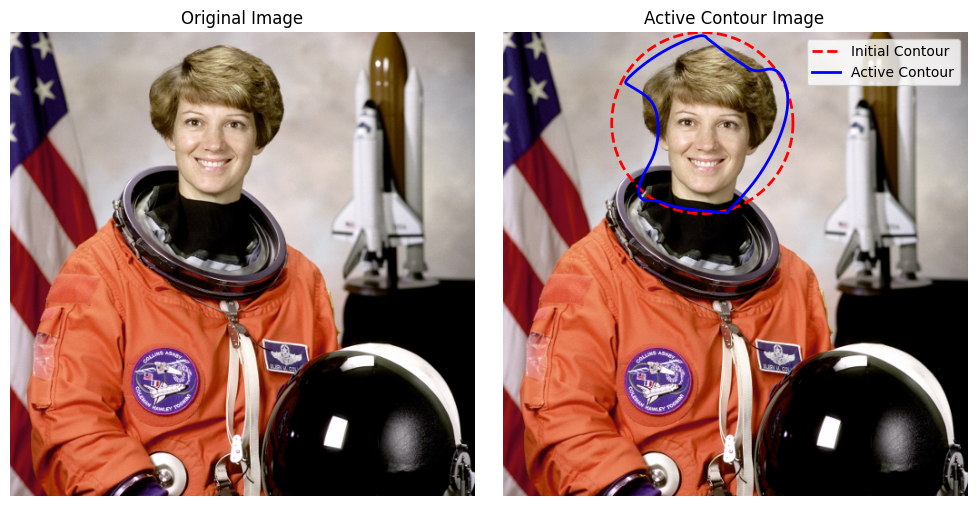

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour

img = data.astronaut()

gray_img = rgb2gray(img)

s = np.linspace(0, 2*np.pi, 400)
x = 220 + 100 * np.cos(s)
y = 100 + 100 * np.sin(s)
init = np.array([x, y]).T

cntr = active_contour(
    gaussian(gray_img, 3),
    init,
    alpha=0.002,
    beta=2,
    gamma=0.008
)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Original image
ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title("Original Image")
ax[0].axis('off')

# Active contour result
ax[1].imshow(img, cmap=plt.cm.gray)
ax[1].plot(init[:, 0], init[:, 1], '--r', lw=2, label="Initial Contour")
ax[1].plot(cntr[:, 0], cntr[:, 1], '-b', lw=2, label="Active Contour")
ax[1].set_title("Active Contour Image")
ax[1].axis('off')
ax[1].legend()

plt.tight_layout()
plt.show()


### 2. Memperbaiki citra hasil deteksi wajah agar seluruh wajah dalam citra dapat terdeteksi dengan tepat

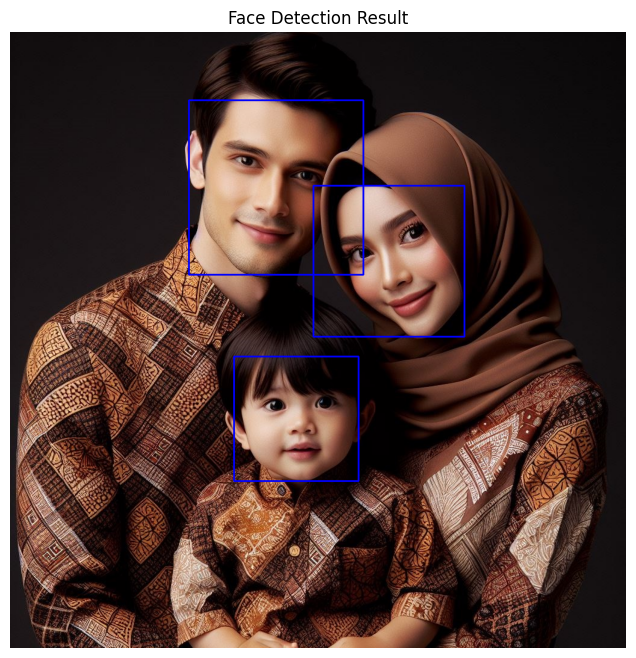

In [14]:
# Output RGB
import io
import zipfile
import requests
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('/content/drive/MyDrive/Bahan PCD/family.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

path = '/content/drive/MyDrive/Bahan PCD/haarcascade_frontalface_default.xml'

faces = face_cascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=7,
    minSize=(30, 30)
)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Face Detection Result")
plt.show()

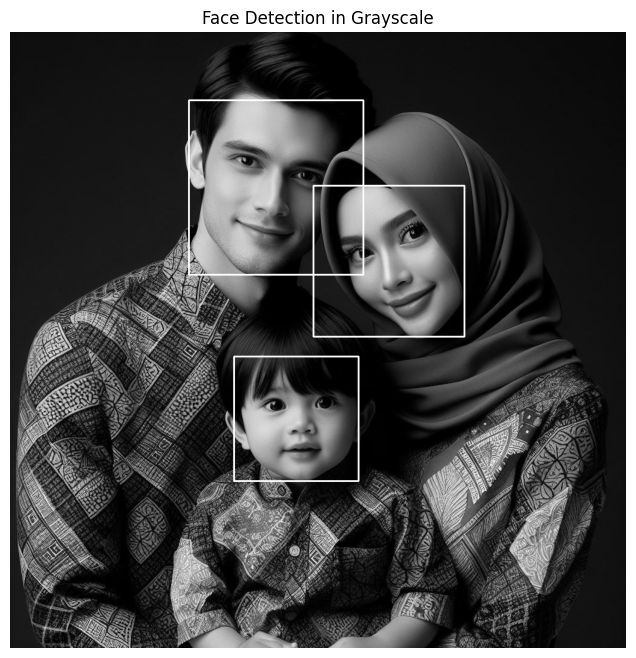

In [15]:
# Output GrayScale
import io
import zipfile
import requests
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('/content/drive/MyDrive/Bahan PCD/family.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

path = '/content/drive/MyDrive/Bahan PCD/haarcascade_frontalface_default.xml'

faces = face_cascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=7,
    minSize=(30, 30)
)

for (x, y, w, h) in faces:
    cv2.rectangle(gray, (x, y), (x + w, y + h), (255, 0, 0), 2)

plt.figure(figsize=(8, 8))
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.title("Face Detection in Grayscale")
plt.show()